# Assigment
1. Generate suitable descriptive statistics of the distribution of 
- academic field - Richard
- year in which they attained their highest degree - Akshay
- year they were hired at the university - Aravindh
- academic rank in 1995 - Vijay
- monthly salary in 1995 by sex - Kyle
2. Write a paragraph commenting on any differences you observe between men and women faculty in these measurements.

## Import necessary packages and load the dataset

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
df = pd.read_csv("salary.txt", sep=r'[\t\s]+', header=0, engine='python')
df.head()

case  id sex    deg  yrdeg  field  startyr  year    rank  admin   salary
0     1   1   F  Other     92  Other       95    95  Assist      0   6684.0
1     2   2   M  Other     91  Other       94    94  Assist      0   4743.0
2     3   2   M  Other     91  Other       94    95  Assist      0   4881.0
3     4   4   M    PhD     96  Other       95    95  Assist      0   4231.0
4     5   6   M    PhD     66  Other       91    91    Full      1  11182.0

## Distribution of Academic Fields

In [56]:
# Distribution of Academic Fields

fig = px.histogram(df, x='field', title='Distribution of Academic Fields',
                   labels={'field': 'Academic Field', 'count': 'Count'})
fig.update_layout(title_font_size=20, title_x=0.5, 
                  xaxis_title='Academic Field', yaxis_title='Number of Faculty Members')

fig.show()

Most of the faculty members are in other academic fields other than Arts and Humanities and Professional fields. 

## Year of Highest Degree Attained

In [57]:
df[['yrdeg']].head()

yrdeg
0     92
1     91
2     91
3     96
4     66

In [58]:
# Proper format for year
df['yrdeg_clean'] = df['yrdeg']+1900
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19792 entries, 0 to 19791
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   case         19792 non-null  int64  
 1   id           19792 non-null  int64  
 2   sex          19792 non-null  object 
 3   deg          19792 non-null  object 
 4   yrdeg        19792 non-null  int64  
 5   field        19792 non-null  object 
 6   startyr      19792 non-null  int64  
 7   year         19792 non-null  int64  
 8   rank         19788 non-null  object 
 9   admin        19792 non-null  int64  
 10  salary       19792 non-null  float64
 11  yrdeg_clean  19792 non-null  int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 1.8+ MB


In [59]:
df['yrdeg_clean'].describe()

count    19792.000000
mean      1972.106760
std          8.504135
min       1948.000000
25%       1967.000000
50%       1972.000000
75%       1978.000000
max       1996.000000
Name: yrdeg_clean, dtype: float64

In [60]:
df[df['sex']=='F']['yrdeg_clean'].describe()

count    3926.000000
mean     1976.611055
std         8.343228
min      1954.000000
25%      1971.000000
50%      1976.000000
75%      1983.000000
max      1995.000000
Name: yrdeg_clean, dtype: float64

In [61]:
df[df['sex']=='M']['yrdeg_clean'].describe()

count    15866.000000
mean      1970.992185
std          8.168996
min       1948.000000
25%       1966.000000
50%       1970.000000
75%       1976.000000
max       1996.000000
Name: yrdeg_clean, dtype: float64

In [62]:
# Distribution of Year of Highest Degree Attained

fig = px.histogram(df, x="yrdeg_clean", 
                   title="Distribution of Year of Highest Degree Attained",
                   labels={'yrdeg_clean': 'Year', 'count': 'Frequency'},
                   nbins=20)

fig.update_layout(
    xaxis_title="Year of Highest Degree",
    yaxis_title="Number of Faculty Members",
    bargap=0.05,
    title_font_size=20,
    title_x=0.5
)

fig.show()

In [63]:
# Distribution of Year of Highest Degree Attained by Sex

fig = px.histogram(df, x="yrdeg_clean", 
                   color="sex",  
                   marginal="box",
                   hover_data=df.columns, 
                   color_discrete_map={"M": "orange", "F": "blue"},
                   labels={'yrdeg_clean': 'Year', 'count': 'Frequency'})

fig.update_layout(
    bargap=0.2,
    title_text="Distribution of Year of Highest Degree Attained by Sex",
    title_font_size=20,
    yaxis_title="Number of Faculty Members",
    xaxis_title="Year of Highest Degree",
    legend_title="Sex",
    title_x=0.5
)


### Inference
 - Median year of highest degree attained for male = 1970
 - Median year of highest degree attained for female = 1975


- From the boxplots for distribution of year of highest degree attained by sex, we can see that the distribution of year for females attaining their highest degree is more recent compared to that of males.
- From the joint histogram, it is observed that the number of females(blue) attaining highest degree is much lesser than that of males(orange) before 1970, and approaches equality around 1990.

## Year Hired At The University

In [64]:


df['startyr_clean'] = df['startyr'] + 1900

# Compute counts directly
year_counts = df['startyr_clean'].value_counts().sort_index()

#print(year_counts)

# Find the year with the max count
max_x = year_counts.idxmax()  # Year with max hiring
max_y = year_counts.max()  # Max frequency

# Create bar chart
fig = px.bar(x=year_counts.index, 
             y=year_counts.values, 
             title="Distribution of Year Hired at The University",
             labels={'x': 'Year of Hiring', 'y': 'Number of Faculty Members'})

# Add marker for max value
fig.add_trace(go.Scatter(
    x=[max_x],
    y=[max_y],
    mode="markers+text",
    marker=dict(size=12, color="red", symbol="triangle-up"),
    showlegend=False
))

# Update layout
fig.update_layout(
    xaxis_title="Year of Hiring",
    yaxis_title="Number of Faculty Members",
    title_font_size=20,
    title_x=0.5,
    
)

fig.show()

### Inference

From the graph, we can see most of them were hired between 1965-1980, and the max being the year **1972**, where **932** faculty members were hired

## Academic rank in 1955

In [65]:
df_1995 = df[df["year"] == 95]

rank_summary = df_1995["rank"].value_counts()
rank_summary
# Descriptive statistics of academic rank in 1995 by sex
rank_summary_by_sex = df_1995.groupby('sex')['rank'].value_counts(normalize=True).unstack().fillna(0)
rank_summary_by_sex *= 100  # Convert to percentage
print(rank_summary_by_sex)

rank     Assist      Assoc       Full
sex                                  
F     35.452323  33.740831  30.806846
M     14.309764  25.168350  60.521886


In [66]:
import plotly.express as px

# Distribution of Academic Rank in 1995 by Sex
fig = px.histogram(df_1995, x="rank", color="sex", barmode="group",
                   title="Distribution of Academic Rank in 1995 by Sex",
                   labels={'rank': 'Academic Rank', 'count': 'Count'},
                   category_orders={"rank": ["Assist", "Assoc", "Full"]})

fig.update_layout(
    xaxis_title="Academic Rank",
    yaxis_title="Number of Faculty Members",
    title_font_size=20,
    title_x=0.5
)

fig.show()

In 1995, the distribution of academic ranks among male and female faculty members shows notable differences. 
Among male faculty, 60% held the rank of Full Professor, 25% were Associate Professors, and 14% were Assistant Professors. \
However, among female faculty, only 30% were Full Professors, 33% were Associate Professors, and 35% were Assistant Professors. 

This shows that a higher proportion of male faculty members held the rank of Full Professor compared to their female counterparts, 
while a higher proportion of female faculty members were at the Assistant Professor rank. 
These differences show a potential disparity in career progression between male and female faculty members in 1995.

## Distribution of Salary by Sex

Percent of faculty members who were female, 1995: 25.610519724483403
Average salary for men in 1995: 6731.6397828282825
Average salary for women in 1995: 5396.908300733497
Median salary for men, 1995: 6313.0
Median salary for women, 1995: 5016.0


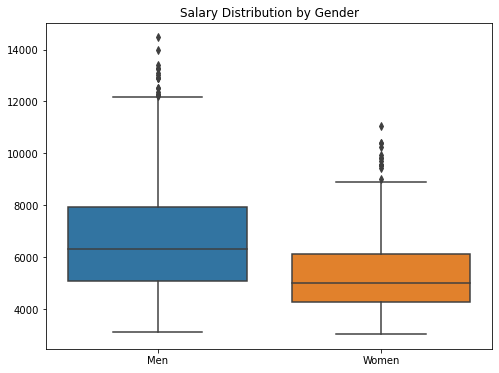

In [7]:
#Salary by Sex

import statistics

import matplotlib.pyplot as plt
import seaborn as sns

#Split up dataset by sex, filter to only include 1995 to limit time effects
salaries_men = df[(df['sex'] == 'M') & (df['year'] == 95)]['salary']
salaries_women = df[(df['sex'] == 'F') & (df['year'] == 95)]['salary']

#Gender ratio of professors in 1995
print("Percent of faculty members who were female, 1995: " + str(100*(len(salaries_women)/(len(salaries_men) + len(salaries_women)))))

#Average male vs. female salary
avg_salary_men = statistics.fmean(salaries_men)
avg_salary_women = statistics.fmean(salaries_women)

print("Average salary for men in 1995: " + str(avg_salary_men))
print("Average salary for women in 1995: " + str(avg_salary_women))

#Median male vs. female salary
median_salary_men = statistics.median(salaries_men)
median_salary_women = statistics.median(salaries_women)

print("Median salary for men, 1995: " + str(median_salary_men))
print("Median salary for women, 1995: " + str(median_salary_women))

#Combine data into a list of datasets for plotting
salaries_comb = [salaries_men, salaries_women]

#Plot data
plt.figure(figsize=(8, 6))
sns.boxplot(data=salaries_comb)
plt.xticks([0, 1], ['Men', 'Women'])
plt.title('Salary Distribution by Gender')
plt.show()

#Takeaways: 
#The average salary for women is $5396.91, which is about 80% of the average salary 
#for men of $6731.64. The median for women is $5016, which is about 79% of the median 
#for men of $6313. Based on the plot, it seems like most of this gap is at the top end.

In [68]:
import statistics# Split dataset by sex
salaries_men = df[df['sex'] == 'M']['salary']
salaries_women = df[df['sex'] == 'F']['salary']

# Calculate average salary for each sex
avg_salary_men = statistics.fmean(salaries_men)
avg_salary_women = statistics.fmean(salaries_women)

print("Average salary for men:", avg_salary_men)
print("Average salary for women:", avg_salary_women)

# Calculate median salary for each sex
median_salary_men = statistics.median(salaries_men)
median_salary_women = statistics.median(salaries_women)

print("Median salary for men:", median_salary_men)
print("Median salary for women:", median_salary_women)

# Create a box plot using Plotly Express
fig = px.box(
    df,
    x='sex',
    y='salary',
    category_orders={'sex': ['M', 'F']},
    title='Salary Distribution by Gender',
    labels={'sex': 'Gender', 'salary': 'Salary'}
)

fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Salary',
    title_font_size=20,
    title_x=0.5
)

fig.show()

Average salary for men: 4854.54461653851
Average salary for women: 4185.462274325013
Median salary for men: 4505.0
Median salary for women: 3996.0
